<a href="https://www.kaggle.com/rajnishkumar546/heart-failure?scriptVersionId=87660913" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

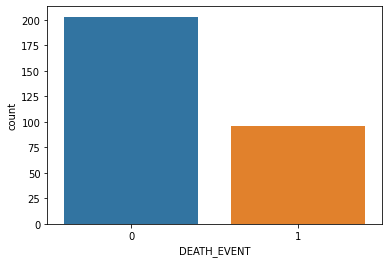

In [5]:
sns.countplot(df['DEATH_EVENT'])
#As we less death 

In [6]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.shape

(299, 13)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes', ylabel='count'>

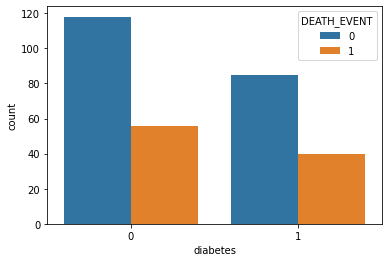

In [10]:
sns.countplot(df['diabetes'], hue=df['DEATH_EVENT'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

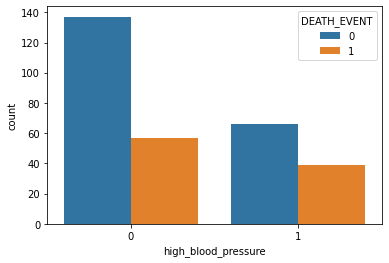

In [11]:
sns.countplot(df['high_blood_pressure'], hue = df['DEATH_EVENT'])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('DEATH_EVENT', axis = 1)

In [14]:
y = df['DEATH_EVENT']

In [15]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

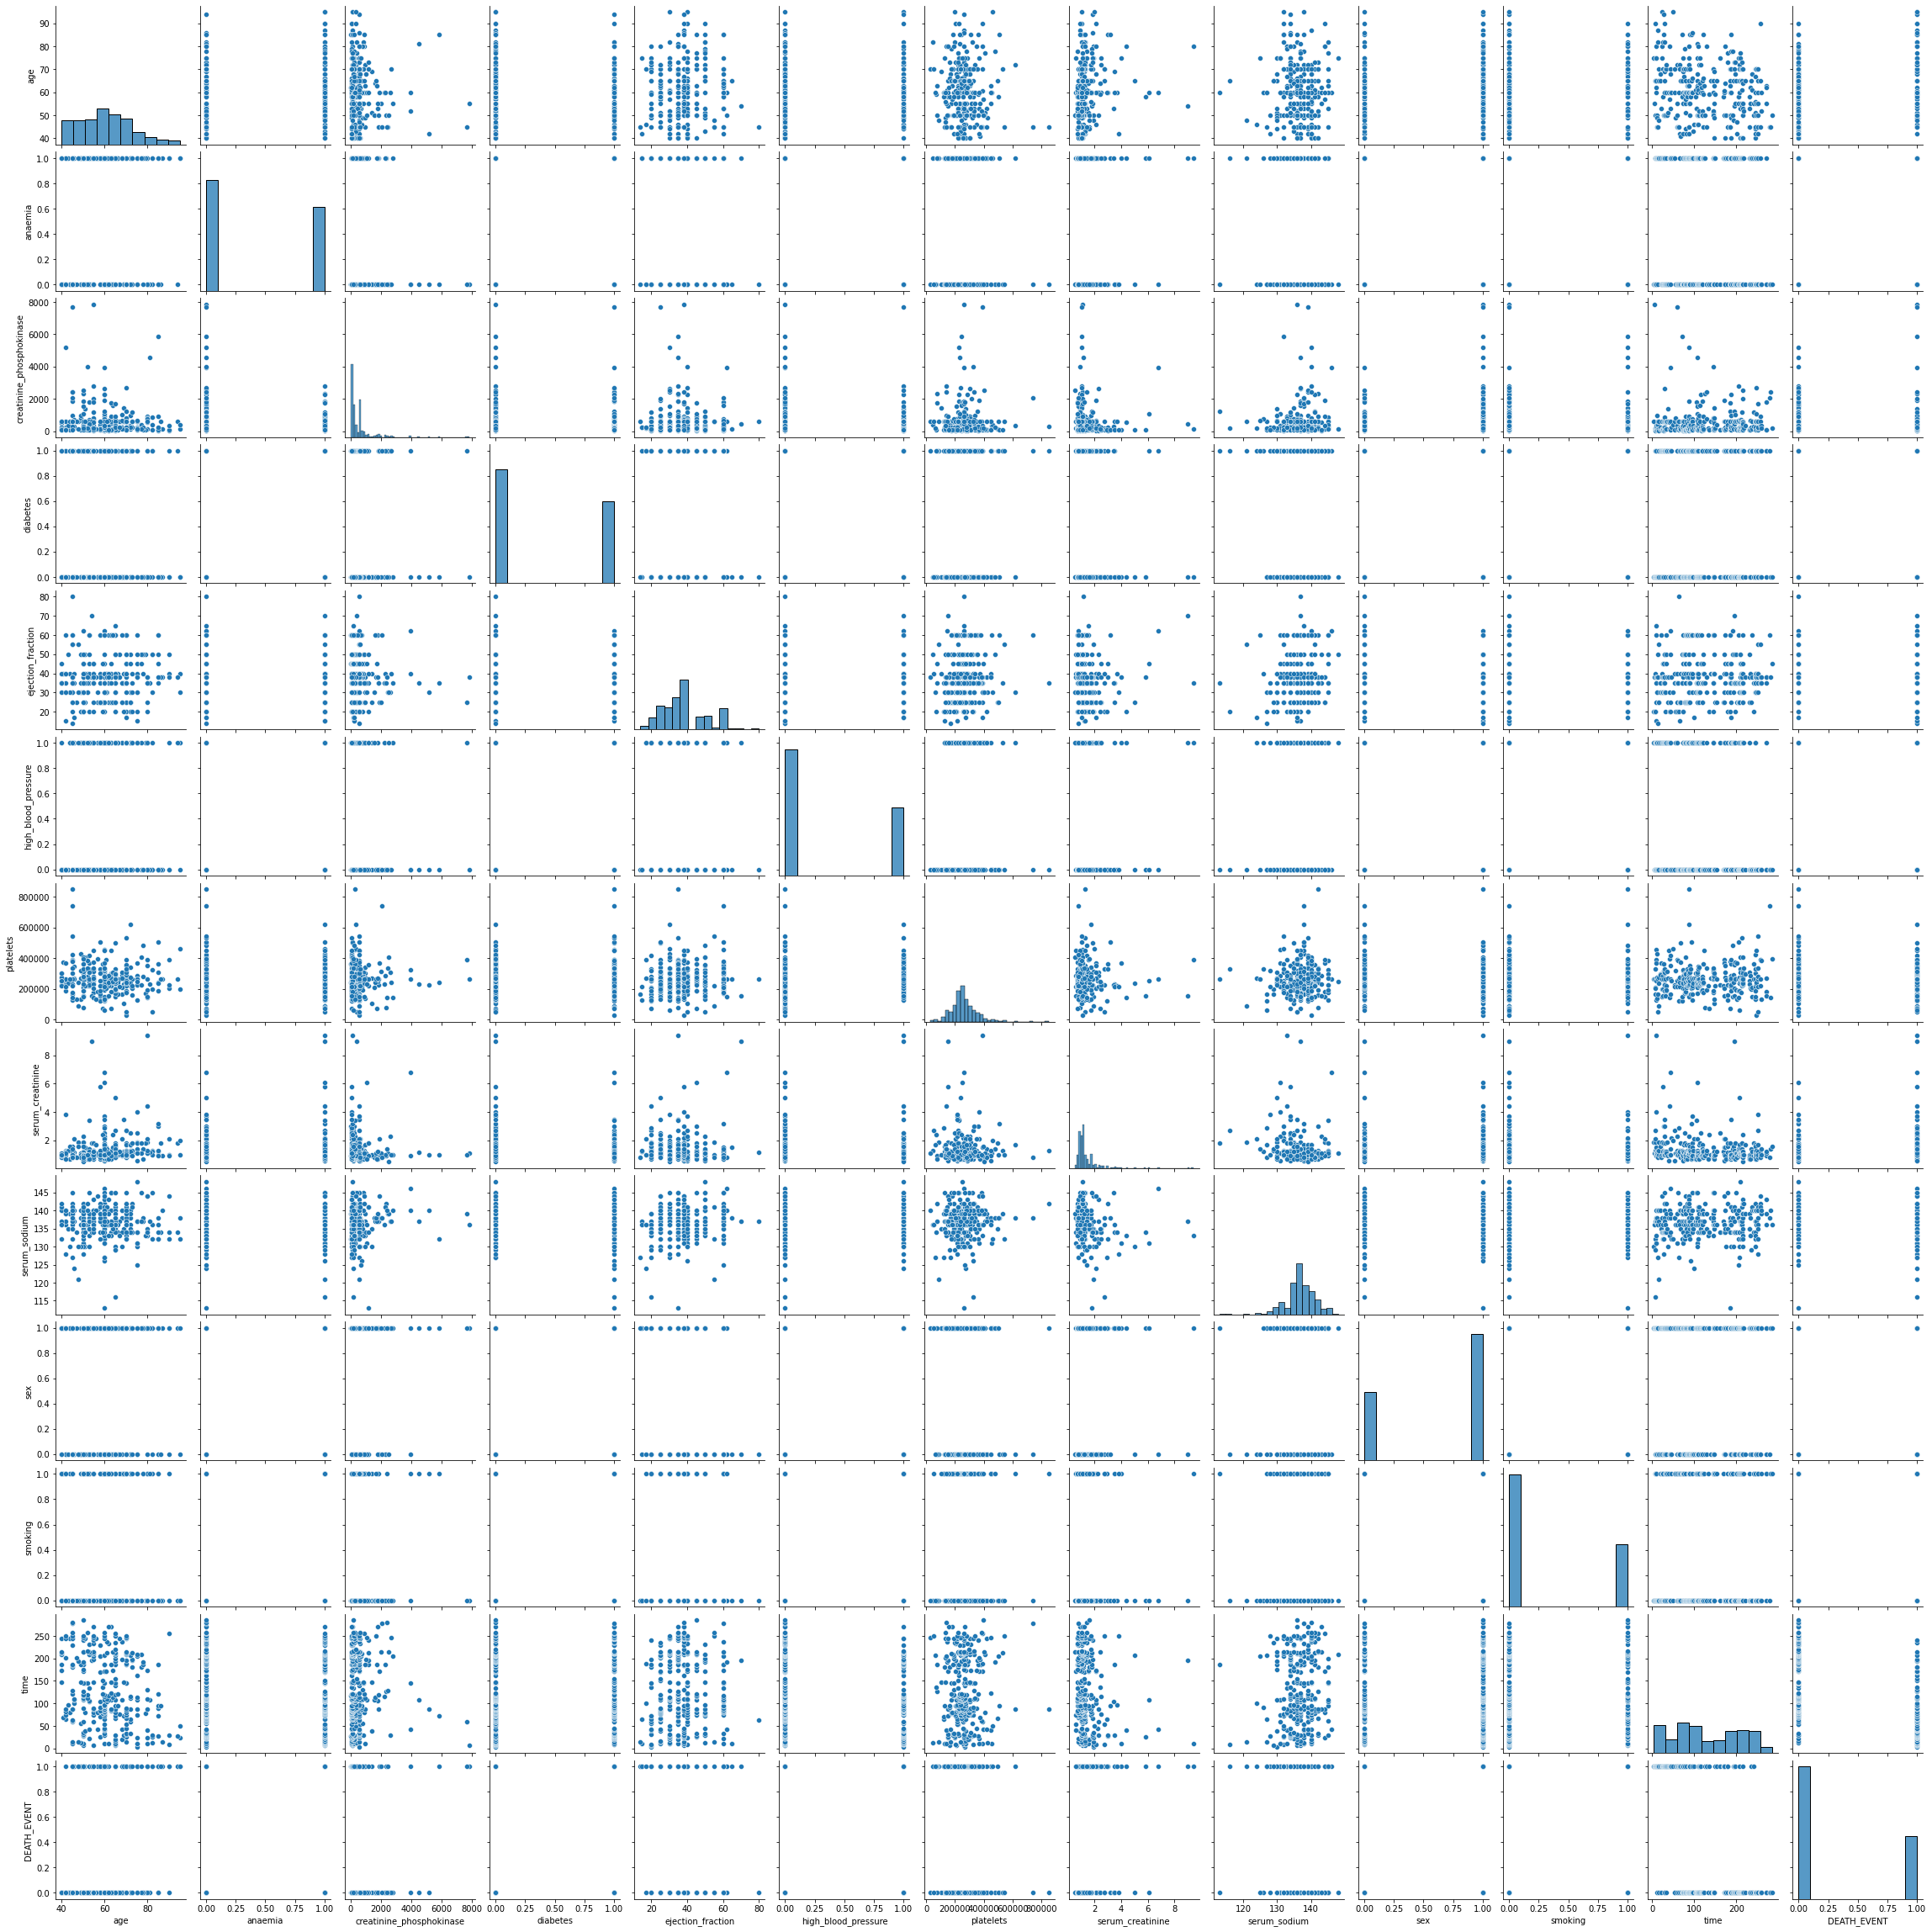

In [16]:
sns.pairplot(df)

In [17]:
#Pairplot gives best idea for model choosing

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
randomforest = RandomForestClassifier(n_estimators=100)

In [20]:
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
pred = randomforest.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        45
           1       0.76      0.87      0.81        15

    accuracy                           0.90        60
   macro avg       0.86      0.89      0.87        60
weighted avg       0.91      0.90      0.90        60



In [24]:
#we get good accurecy now lets try with hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
paramgrid = {
     'n_estimators' : [50,100,150],
     'criterion' : ['gini', 'entropy'],
     'max_depth' : [None,1,2,3,5,6,7,8]
    
}

In [27]:
grid = GridSearchCV(randomforest, param_grid=paramgrid, cv = 10, n_jobs=-1)

In [28]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150]})

In [29]:
grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}

In [30]:
grid.best_score_

0.841123188405797

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
from sklearn.svm import SVC

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
svm = SVC()
tree = DecisionTreeClassifier()

In [35]:
ada = AdaBoostClassifier()

In [36]:
paramgrid = {
    'base_estimator' : [svm, tree],
    'n_estimators' : [50,100,75,125],
    'learning_rate' : [0.1,0.5,0.8,0.6,0.01, 1] 
}

In [37]:
grid = GridSearchCV(ada, param_grid=paramgrid, cv= 10, n_jobs=-1)

In [38]:
grid.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 117, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 454, in _validate_estimator
    "AdaBoostClassifier with algorithm='SAMME.R' requires "
TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probab

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [SVC(), DecisionTreeClassifier()],
                         'learning_rate': [0.1, 0.5, 0.8, 0.6, 0.01, 1],
                         'n_estimators': [50, 100, 75, 125]})

In [39]:
grid.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 0.1,
 'n_estimators': 100}

In [40]:
grid.best_score_

0.7407608695652174

In [41]:
pred = grid.predict(X_test)

Overall our randomforest classify best among all data

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.61      0.73      0.67        15

    accuracy                           0.82        60
   macro avg       0.76      0.79      0.77        60
weighted avg       0.83      0.82      0.82        60



In [43]:
#so randomforest is best